# Assignment 2 : Human Value Detection challenge

In [1]:
import pandas as pd
import numpy as np
from statistics import mean
import os

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!wget https://zenodo.org/record/8248658/files/arguments-training.tsv
!wget https://zenodo.org/record/8248658/files/arguments-validation.tsv
!wget https://zenodo.org/record/8248658/files/arguments-test.tsv
!wget https://zenodo.org/record/8248658/files/labels-training.tsv
!wget https://zenodo.org/record/8248658/files/labels-validation.tsv
!wget https://zenodo.org/record/8248658/files/labels-test.tsv

--2024-01-01 15:42:03--  https://zenodo.org/record/8248658/files/arguments-training.tsv
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.185.79.172, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/8248658/files/arguments-training.tsv [following]
--2024-01-01 15:42:03--  https://zenodo.org/records/8248658/files/arguments-training.tsv
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 1012498 (989K) [application/octet-stream]
Saving to: 'arguments-training.tsv'

arguments-training. 100%[===================>] 988.77K  1.27MB/s    in 0.8s    

2024-01-01 15:42:05 (1.27 MB/s) - 'arguments-training.tsv' saved [1012498/1012498]

--2024-01-01 15:42:06--  https://zenodo.org/record/8248658/files/arguments-validation.tsv
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.185.79.172, 188.184.103.159, ...
Conne

In [3]:
# Encodes split files to Dataframe object

def load_data_from_tsv(tsv_file):
    dataframe = pd.read_csv(tsv_file, encoding='utf-8', sep='\t', header=0)
    return dataframe

In [4]:

# Merges Level 2 annotations to Level 3 categories
# by performing logical OR of annotations of level 2 categories belonging to the same level 3 category

def merge_annotations(dataframe):

    level2_to_level3_mapping = {
    'Openness to change': ['Self-direction: thought', 'Self-direction: action', 'Stimulation', 'Hedonism'],
    'Self-enhancement': ['Hedonism', 'Achievement', 'Power: dominance', 'Power: resources', 'Face'],
    'Conversation': ['Face', 'Security: personal', 'Security: societal', 'Tradition', 'Conformity: rules', 'Conformity: interpersonal'],
    'Self-transcendence': ['Humility', 'Benevolence: caring', 'Benevolence: dependability', 'Universalism: concern', 'Universalism: nature', 'Universalism: tolerance', 'Universalism: objectivity'],
    }

    # Create new columns based on level2_to_level3_mapping
    for level3_category, level2_categories in level2_to_level3_mapping.items():
        dataframe[level3_category] = dataframe[level2_categories].any(axis=1).astype(int)

    # Drop original level 2 columns
    dataframe = dataframe.drop(sum(level2_to_level3_mapping.values(), []), axis=1)

    return dataframe


In [5]:
# Processes data for a given split

def process_data(split):
    arguments_df = load_data_from_tsv("arguments-" + split + ".tsv")
    labels_df = load_data_from_tsv("labels-" + split + ".tsv")


    if arguments_df is not None and labels_df is not None:
        merged_data = pd.merge(arguments_df, labels_df, on='Argument ID')  # Combines the two `DataFrames` on column `Argument ID`
        merged_data = merge_annotations(merged_data)
        return merged_data
    else:
        return None

training_dataframe = process_data('training')
validation_dataframe = process_data('validation')
test_dataframe = process_data('test')

In [6]:
arguments_test= load_data_from_tsv('arguments-test.tsv')
arguments_test.head()

,Argument ID,Conclusion,Stance,Premise
0,A26004,We should end affirmative action,against,affirmative action helps with employment equity.
1,A26010,We should end affirmative action,in favor of,affirmative action can be considered discrimin...
2,A26016,We should ban naturopathy,in favor of,naturopathy is very dangerous for the most vul...
3,A26024,We should prohibit women in combat,in favor of,women shouldn't be in combat because they aren...
4,A26026,We should ban naturopathy,in favor of,once eradicated illnesses are returning due to...


In [7]:
labels_test= load_data_from_tsv('labels-test.tsv')
labels_test.head()

,Argument ID,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,...,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A26004,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,A26010,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
2,A26016,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,A26024,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A26026,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0


In [8]:
test_dataframe.head()

,Argument ID,Conclusion,Stance,Premise,Openness to change,Self-enhancement,Conversation,Self-transcendence
0,A26004,We should end affirmative action,against,affirmative action helps with employment equity.,0,1,1,1
1,A26010,We should end affirmative action,in favor of,affirmative action can be considered discrimin...,0,1,0,1
2,A26016,We should ban naturopathy,in favor of,naturopathy is very dangerous for the most vul...,0,1,1,1
3,A26024,We should prohibit women in combat,in favor of,women shouldn't be in combat because they aren...,0,1,0,0
4,A26026,We should ban naturopathy,in favor of,once eradicated illnesses are returning due to...,0,1,1,1


In [9]:
validation_dataframe.shape

(1896, 8)

In [10]:
training_dataframe.shape

(5393, 8)

In [11]:
test_dataframe.shape

(1576, 8)

# Model Definition

In [12]:
seeds = [42, 123, 456]
categories = ['Openness to change', 'Self-enhancement', 'Conversation', 'Self-transcendence']
model_dict='/model/'

In [13]:
# Function to ensure the directory exists
def ensure_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        
ensure_directory(model_dict)

# 1. Baseline

In [38]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.utils import check_random_state
import joblib

In [39]:

def train_baselines(classifier, train_data, seed, model_dir, val_data=None):
    models = {}  # Dictionary to store trained models

    for i, category_name in enumerate(categories):
        y_train = train_data[category_name].values

        # Train the model with the specified random_state
        classifier.set_params(random_state=seed)
        classifier.fit(train_data, y_train)
        models[category_name] = classifier  # Store the trained model

        # Save the model to the specified directory
        model_filename = os.path.join(model_dir, '/{}_{}_seed{}.joblib'.format(classifier.strategy,category_name,seed))
        joblib.dump(models[category_name], model_filename)
        
    if val_data is not None:

        evaluate_metrics = evaluate_metrics_baseline(val_data, seed, model_dir, classifier.strategy)
        return evaluate_metrics


# Function to evaluate and print metrics
def evaluate_metrics_baseline(test_data, seed, model_dir, classifier_name):
    models = {}  # Dictionary to store loaded models
    evaluation_metrics = {}

    for i, category_name in enumerate(categories):
        # Loading the model from the specified directory
        model_filename = os.path.join(model_dir, '/{}_{}_seed{}.joblib'.format(classifier_name,category_name,seed))

        models[category_name] = joblib.load(model_filename)

        y_true = test_data[category_name].values

        # Setting random_state for prediction
        models[category_name].set_params(random_state=seed)

        # Predicting on validation set
        y_pred = models[category_name].predict(test_data)

        f1 = f1_score(y_true, y_pred, zero_division=0)
        evaluation_metrics[category_name]= round(f1,2)

    evaluation_metrics['avg-f1-score'] = round(mean(list(evaluation_metrics.values())),2)

    return {'f1-score': evaluation_metrics, 'macro-avg-f1score': evaluation_metrics['avg-f1-score']}



# 2. BERT-based classifier

In [ ]:
# Installing the transformers library and additional libraries if looking process
!pip install -q transformers
!pip install mlcm

In [ ]:
!pip install tokenizers

In [ ]:
!pip install transformers[torch] accelerate -U


In [ ]:
!pip install datasets

In [14]:
from sklearn import metrics
import transformers
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from datasets import (Dataset, DatasetDict, load_dataset)
from transformers import AutoModel, AutoTokenizer, get_linear_schedule_with_warmup, AutoModelForSequenceClassification, PreTrainedModel, BertModel, BertForSequenceClassification, TrainingArguments, Trainer
from transformers.trainer_utils import get_last_checkpoint, set_seed
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, precision_score, recall_score

### Definition of global variables
   Here we select the model and specify the hyperparameters.

In [15]:
# Sections of config

# Defining some key variables that will be used later on in the training
#MODEL_NAME = 'bert-base-uncased'
#MODEL_NAME = 'bert-large-uncased'
#MODEL_NAME = 'roberta-base'
MODEL_NAME = 'roberta-large'

MAX_LEN = 75
BATCH_SIZE = 16 #8
EPOCHS = 5#12
LEARNING_RATE = 2e-05
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

<b>AutoModel</b> from Hugging Face can automatically retrieve the relevant model given the name/path to the pretrained weights/config/vocabulary.
- We instantiate one of the AutoModel: <i>AutoModelForSequenceClassification</i> – This class is used to get a text classification model
- <i>AutoTokenizer</i>- for loading the corresponding tokenizer for the model

And get the model/checkpoint name from the ModelHub and load the corresponding AutoModel and tokenizer by using the <i>from_pretrained</i> that directly create a class of the relevant architecture

In [16]:
def tokenize_and_encode(examples):
    """Tokenizes specified columns"""
    return tokenizer(
        examples['text'],
        truncation=True,
        padding=True,
        return_token_type_ids=True
    )

### 
- Loss function is designed to evaluate all the probability of categories individually rather than as compared to other categories. Hence used BCE rather than only Cross Entropy for defining loss.
- Similarly Sigmoid is calculated of the outputs rather than Softmax.

In [105]:

def convert_to_dataset(train_data, test_data, inputs):
    """
        Converts pandas DataFrames into a DatasetDict with attributes "train" and "test" for the listed arguments

        Parameters
        ----------
        train_dataframe : pd.DataFrame
            Arguments to be listed as "train"
        test_dataframe : pd.DataFrame
            Arguments to be listed as "test"
        inputs : list[str]
            The inputs to include in training: C, CP, or CPS

        Returns
        -------
        tuple(DatasetDict, list[str])
            a `DatasetDict` with attributes "train" and "test" for the listed arguments,
            a `list` with the contained labels
        """
    
    # Converting 'Stance' to numerical format if it's present
    if 'Stance' in inputs:
        columns_to_concat = [col for col in inputs if col != 'Stance']
        stance_encoder = LabelEncoder()
        train_data['Stance'] = stance_encoder.fit_transform(train_data['Stance'])
        test_data['Stance'] = stance_encoder.fit_transform(test_data['Stance'])
        columns= ['text', 'Stance']
    else:
        columns_to_concat = inputs
        columns= ['text']
    # Creating 'text' column by concatenating specified columns
    train_data['text'] = train_data[columns_to_concat].astype(str).agg(' '.join, axis=1)
    test_data['text'] = test_data[columns_to_concat].astype(str).agg(' '.join, axis=1)

    # Defining columns for the DatasetDict
    column_intersect = [x for x in (columns + categories) if x in train_data.columns.values]


    train_dataset = Dataset.from_dict((train_data[column_intersect]).to_dict('list'))
    test_dataset = Dataset.from_dict((test_data[column_intersect]).to_dict('list'))

    ds = DatasetDict()
    ds['train'] = train_dataset
    ds['test'] = test_dataset
    
    # Mapping values of all the categories into a list.
    ds = ds.map(lambda x: {"labels": [int(x[c]) for c in ds['train'].column_names if
                                      c not in ['text','Argument ID', 'Conclusion', 'Stance', 'Premise', 'Part']]})

    cols = ds['train'].column_names
    
    if 'Stance' in inputs:
        cols.remove('labels')
        cols.remove('Stance')
    else:   
        cols.remove('labels')
    # Tokenizing 'text'
    ds_enc = ds.map(tokenize_and_encode, batched=True, remove_columns=cols)

    cols = [col for col in cols if col not in (inputs+columns)]
    
    return ds_enc, cols


# A transformers `Trainer` with custom loss computation
class MultiLabelTrainer(Trainer):

#Overrides loss computation from Trainer class
    def compute_loss(self, model, inputs, return_outputs=False):
       
        labels = inputs.pop("labels")
        
        outputs = model(**inputs)
        logits = outputs.logits
        
        loss_fct = torch.nn.BCEWithLogitsLoss()
        
        loss = loss_fct(logits.view(-1, self.model.config.num_labels),
                        labels.float().view(-1, self.model.config.num_labels))
        
        return (loss, outputs) if return_outputs else loss


def f1_score_per_label(y_pred, y_true, value_classes, thresh=0.5, sigmoid=True):
    """Compute label-wise and averaged F1-scores"""
    y_pred = torch.from_numpy(y_pred)
    y_true = torch.from_numpy(y_true)
    if sigmoid:
        y_pred = y_pred.sigmoid()

    y_true = y_true.bool().numpy()
    y_pred = (y_pred > thresh).numpy()

    f1_scores = {}
    for i, v in enumerate(value_classes):
        f1_scores[v] = round(f1_score(y_true[:, i], y_pred[:, i], zero_division=0), 2)

    f1_scores['avg-f1-score'] = round(np.mean(list(f1_scores.values())), 2)

    return f1_scores


def compute_metrics(eval_pred, value_classes):
    """Custom metric calculation function for MultiLabelTrainer"""
    predictions, labels = eval_pred
    f1scores = f1_score_per_label(predictions, labels, value_classes)
    return {'f1-score': f1scores, 'macro-avg-f1score': f1scores['avg-f1-score']}

# Loads Bert model from specified directory and converts to CUDA model if available
def load_model_from_data_dict(model_dict, num_labels):
    model = AutoModelForSequenceClassification.from_pretrained(model_dict, num_labels=num_labels)
    if torch.cuda.is_available():
        return model.to('cuda')
    return model


def train_bert_model(train_data, inputs, model_dict='/model/', test_data=None, EPOCHS=5, seed=42):
    """
        Trains Bert model with the arguments in `train_data`

        Parameters
        ----------
        train_data: pd.DataFrame
            The arguments to be trained on
        model_dict: str
            The directory for storing the trained model
        inputs : list[str]
            The inputs to include in training: C, CP, or CPS
        test_data: pd.DataFrame, optional
            The validation arguments (default is None)
        EPOCHS: int, optional
            The number of training epochs (default is 5)
        seed: int, optional
            The seed value (default is 42)

        Returns
        -------
        Metrics
            result of validation if `test_dataframe` is not None
        NoneType
            otherwise
        """
    print(model_dict)
    set_seed(seed)

    if test_data is None:
        test_data = train_data
    ds, labels = convert_to_dataset(train_data, test_data, inputs)


    args = TrainingArguments(
        output_dir=model_dict,
        evaluation_strategy="steps",
        learning_rate=2e-5,
        per_device_train_batch_size=BATCH_SIZE,
        per_device_eval_batch_size=BATCH_SIZE,
        num_train_epochs=EPOCHS,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model='macro-avg-f1score',
        save_steps=800,        # Save a checkpoint every 800 steps
        logging_steps=400
    )
    
    model = load_model_from_data_dict(MODEL_NAME, num_labels=len(labels))
    
    multi_trainer = MultiLabelTrainer(
        model,
        args,
        train_dataset=ds["train"],
        eval_dataset=ds["test"],
        compute_metrics=lambda x: compute_metrics(x, labels),
        tokenizer=tokenizer
    )
    
    multi_trainer.train()
    
    model.save_pretrained(model_dict)
    
    if test_dataframe is not None:
        return multi_trainer.evaluate()


def predict_bert_model(dataframe, inputs, model_dict='/model/', analyze=False):
    """
        Classifies each argument using the Bert model stored in `model_dict`

        Parameters
        ----------
        dataframe: pd.Dataframe
            The arguments to be classified
        model_dict: dict
            The dictionary containing the trained model
        inputs : list[str]
            The inputs to include in training: C, CP, or CPS
        analyze : bool, optional
            If True then perform error analysis on predictions

        Returns
        -------
        Metrics
            Result of prediction on 'test' data
        """
    ds, no_labels = convert_to_dataset(dataframe, dataframe, inputs)
    num_labels = len(no_labels)
    labels_true = np.array(ds['test']['labels'])
    ds = ds.remove_columns(['labels'])

    args = TrainingArguments(
        output_dir=model_dict,
        do_train=False,
        do_eval=False,
        do_predict=True,
        per_device_eval_batch_size=BATCH_SIZE
    )

    model = load_model_from_data_dict(model_dict, num_labels=num_labels)

    multi_trainer = MultiLabelTrainer(
        model,
        args,
        tokenizer=tokenizer
    )

    predictions = multi_trainer.predict(ds['test']).predictions
    predictions_df = pd.DataFrame(predictions, columns=no_labels)
    
    # Calculating label-wise F1 scores and macro-average F1 score using compute_metrics
    metrics = compute_metrics((predictions, labels_true), no_labels)
    
    # Evaluating and computing metrics on the test set
    eval_metrics = multi_trainer.evaluate(ds['test'])
    
    if analyze:
        error_analysis(predictions, labels_true, no_labels)

    return {**metrics,**eval_metrics}


def error_analysis(predictions, labels_true, category_names):
    """
       Analyses the predictions: Precision/Recall Curve, Confusion Metrics
       
       Parameters
       ----------
       predictions : np.ndarray
            The predictions on 'test' data
       labels_true : np.ndarray
            The true labeles of test set
       category_names : list[str]
            The categories used for prediction
    """

    final_predictions = torch.sigmoid(torch.tensor(predictions))
    
    y_pred = (final_predictions > 0.5).numpy()
    y_true = labels_true

    # Analyzing performance for each class
    class_performance = {}
    for i, category in enumerate(category_names):
        class_performance[category] = {
            'Precision': round(precision_score(y_true[:, i], y_pred[:, i], zero_division=0), 2),
            'Recall': round(recall_score(y_true[:, i], y_pred[:, i], zero_division=0), 2)
        }
    class_performance= pd.DataFrame(class_performance)
    print("Class-wise Performance Metrics:")
    print(class_performance)

    # Plotting precision-recall curves for each class
    plt.figure(figsize=(8, 6))
    sns.set(style="darkgrid")
    for i, category in enumerate(category_names):
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_pred[:, i])
        auc_score = auc(recall, precision)
        plt.plot(recall, precision, label=f"{category} (AUC = {auc_score:.2f})")

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves for Different Classes')
    plt.legend()
    plt.show()

    # Creating confusion matrices for each class
    for i, category in enumerate(category_names):
        confusion_mat = confusion_matrix(y_true[:, i], y_pred[:, i])
        plt.figure(figsize=(6, 4))
        sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {category}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    # Identify and display misclassified samples
#     misclassified_samples = np.where(~np.all(y_pred == y_true, axis=1))[0]
#     print("Misclassified Samples:")
#     print(misclassified_samples)



In [106]:
new_data , col = convert_to_dataset(test_dataframe, test_dataframe, ['Premise','Conclusion','Stance'])

  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [107]:
new_data['train']

Dataset({
    features: ['Stance', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1576
})

In [108]:
col

['Openness to change',
 'Self-enhancement',
 'Conversation',
 'Self-transcendence']

In [109]:
training_data = new_data['train']

# Convert Dataset to Pandas DataFrame
training_df = training_data.to_pandas()

# Display the DataFrame
print(training_df)

      Stance        labels                                          input_ids  \
0          0  [0, 1, 1, 1]  [0, 3707, 9856, 3693, 814, 2607, 19, 4042, 235...   
1          1  [0, 1, 0, 1]  [0, 3707, 9856, 3693, 814, 64, 28, 1687, 22587...   
2          1  [0, 1, 1, 1]  [0, 26992, 7367, 39214, 16, 182, 2702, 13, 5, ...   
3          1  [0, 1, 0, 0]  [0, 22197, 4395, 75, 28, 11, 5217, 142, 51, 20...   
4          1  [0, 1, 1, 1]  [0, 25252, 25193, 5554, 14971, 32, 3357, 528, ...   
...      ...           ...                                                ...   
1571       1  [0, 0, 1, 0]  [0, 20999, 8702, 16, 10, 10632, 14, 4685, 1880...   
1572       1  [0, 0, 1, 1]  [0, 20999, 8702, 15774, 5, 4870, 1235, 23783, ...   
1573       1  [1, 1, 1, 1]  [0, 243, 16, 5063, 11, 5, 3168, 9, 5, 1281, 34...   
1574       1  [1, 1, 0, 1]  [0, 37221, 6275, 23, 5, 1281, 672, 197, 28, 71...   
1575       0  [0, 0, 1, 1]  [0, 1185, 14866, 5, 754, 14, 47, 64, 4076, 110...   

                           

# Metrics

# Training and Evaluation

In [18]:
def train_evaluate_classifiers(train_data,val_data, inputs=None, classifier=None, variation =''):
    """
    Train and evaluate classifiers on the training and validation set.

    Parameters:
    - train_data: pd.DataFrame
        The training DataFrame with labels.
    - val_data: pd.DataFrame
        The validation DataFrame with labels.
    - inputs : list[str]
            The inputs to include in training: C, CP, or CPS
    - classifier: str, optional
        The classifier name "uniform"/"majority"/"bert"
    - variation: str, optional
        The model variant in case of BERT : 'w_CPS'/'w_CP'/'w_P'

    Returns:
    - pd.DataFrame
        Dataframe containing metrics for each seed.
    """
    trained_model = {}
    metrics_df=[]
    all_metrics = {}

    for i, seed in enumerate(seeds):
        print(f"Seed : {seed}...")
        if classifier == 'uniform':
            random_uniform_classifier = DummyClassifier(strategy="uniform")
            metrics= train_baselines(random_uniform_classifier, train_data, seed, model_dict , val_data=val_data)
            metrics= {'Seed' : seed, **metrics}
            all_metrics[i+1]= metrics

        elif classifier == 'majority':
            majority_classifier = DummyClassifier(strategy="most_frequent")
            metrics= train_baselines(majority_classifier, train_data, seed, model_dict ,val_data=val_data)
            metrics= {'Seed' : seed, **metrics}
            all_metrics[i+1]= metrics

        elif classifier == 'bert':
            # Training the BERT model for each seed
            metrics = train_bert_model(
                train_data=train_data,
                inputs=inputs,
                model_dict= os.path.join(model_dict, 'bert/{}_seed_{}'.format(variation,seed)),
                test_data=val_data,
                EPOCHS=EPOCHS,
                seed=seed
            )
            metrics= {'Seed' : seed, **metrics}
            all_metrics[i+1]= metrics
        
        else: print("Classifier Unavailable!")


    metrics_df = pd.DataFrame(all_metrics)

    return metrics_df

In [40]:
# Train majority classifiers on the training set
validation_metrics = train_evaluate_classifiers(training_dataframe, validation_dataframe, classifier= 'uniform')

# Access the validation metrics for comparison
print("Uniform Classifier: Validation Metrics:")
validation_metrics

Seed : 42...
Seed : 123...
Seed : 456...
Uniform Classifier: Validation Metrics:


,1,2,3
Seed,42,123,456
f1-score,"{'Openness to change': 0.42, 'Self-enhancement...","{'Openness to change': 0.45, 'Self-enhancement...","{'Openness to change': 0.42, 'Self-enhancement..."
macro-avg-f1score,0.52,0.54,0.53


In [41]:
# Train majority classifiers on the training set
validation_metrics = train_evaluate_classifiers(training_dataframe, validation_dataframe, classifier= 'majority')

# Access the validation metrics for comparison
print("Majority Classifier: Validation Metrics:")
validation_metrics

Seed : 42...
Seed : 123...
Seed : 456...
Majority Classifier: Validation Metrics:


,1,2,3
Seed,42,123,456
f1-score,"{'Openness to change': 0.0, 'Self-enhancement'...","{'Openness to change': 0.0, 'Self-enhancement'...","{'Openness to change': 0.0, 'Self-enhancement'..."
macro-avg-f1score,0.44,0.44,0.44


In [19]:
validation_metrics_CPS = train_evaluate_classifiers(training_dataframe, validation_dataframe, ['Premise','Conclusion','Stance'], classifier= 'bert', variation='w_CPS')

# Access the validation metrics for comparison
print("Bert_w/CPS: Validation Metrics:")
validation_metrics_CPS

Seed : 42...
/model/bert/w_CPS_seed_42


  0%|          | 0/5393 [00:00<?, ?ex/s]

  0%|          | 0/1896 [00:00<?, ?ex/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss,F1-score,Macro-avg-f1score
400,0.533500,0.527768,"{'Openness to change': 0.64, 'Self-enhancement': 0.66, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.76}",0.760000
800,0.371200,0.550577,"{'Openness to change': 0.65, 'Self-enhancement': 0.67, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.76}",0.760000


Trainer is attempting to log a value of "{'Openness to change': 0.64, 'Self-enhancement': 0.66, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.76}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'Openness to change': 0.65, 'Self-enhancement': 0.67, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.76}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Trainer is attempting to log a value of "{'Openness to change': 0.65, 'Self-enhancement': 0.67, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.76}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Seed : 123...
/model/bert/w_CPS_seed_123


  0%|          | 0/5393 [00:00<?, ?ex/s]

  0%|          | 0/1896 [00:00<?, ?ex/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss,F1-score,Macro-avg-f1score
400,0.521700,0.494533,"{'Openness to change': 0.67, 'Self-enhancement': 0.7, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}",0.780000
800,0.338900,0.509412,"{'Openness to change': 0.69, 'Self-enhancement': 0.7, 'Conversation': 0.87, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}",0.780000


Trainer is attempting to log a value of "{'Openness to change': 0.67, 'Self-enhancement': 0.7, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Trainer is attempting to log a value of "{'Openness to change': 0.69, 'Self-enhancement': 0.7, 'Conversation': 0.87, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Seed : 456...
/model/bert/w_CPS_seed_456


  0%|          | 0/5393 [00:00<?, ?ex/s]

  0%|          | 0/1896 [00:00<?, ?ex/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss,F1-score,Macro-avg-f1score
400,0.483700,0.495105,"{'Openness to change': 0.67, 'Self-enhancement': 0.71, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}",0.780000
800,0.320200,0.521200,"{'Openness to change': 0.68, 'Self-enhancement': 0.71, 'Conversation': 0.87, 'Self-transcendence': 0.88, 'avg-f1-score': 0.78}",0.780000


Trainer is attempting to log a value of "{'Openness to change': 0.67, 'Self-enhancement': 0.71, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'Openness to change': 0.68, 'Self-enhancement': 0.71, 'Conversation': 0.87, 'Self-transcendence': 0.88, 'avg-f1-score': 0.78}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Trainer is attempting to log a value of "{'Openness to change': 0.68, 'Self-enhancement': 0.71, 'Conversation': 0.87, 'Self-transcendence': 0.88, 'avg-f1-score': 0.78}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Bert_w/CPS: Validation Metrics:


,1,2,3
Seed,42,123,456
eval_loss,0.550577,0.509412,0.5212
eval_f1-score,"{'Openness to change': 0.65, 'Self-enhancement...","{'Openness to change': 0.69, 'Self-enhancement...","{'Openness to change': 0.68, 'Self-enhancement..."
eval_macro-avg-f1score,0.76,0.78,0.78
eval_runtime,27.5129,27.5083,27.4941
eval_samples_per_second,68.913,68.925,68.96
eval_steps_per_second,2.181,2.181,2.182
epoch,5.0,5.0,5.0


In [20]:
validation_metrics_CP = train_evaluate_classifiers(training_dataframe, validation_dataframe, ['Premise','Conclusion'], classifier= 'bert', variation = 'w_CP')

# Access the validation metrics for comparison
print("Bert_w/CP: Validation Metrics:")
validation_metrics_CP

Seed : 42...
/model/bert/w_CP_seed_42


  0%|          | 0/5393 [00:00<?, ?ex/s]

  0%|          | 0/1896 [00:00<?, ?ex/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss,F1-score,Macro-avg-f1score
400,0.533500,0.527768,"{'Openness to change': 0.64, 'Self-enhancement': 0.66, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.76}",0.760000
800,0.371200,0.550577,"{'Openness to change': 0.65, 'Self-enhancement': 0.67, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.76}",0.760000


Trainer is attempting to log a value of "{'Openness to change': 0.64, 'Self-enhancement': 0.66, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.76}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'Openness to change': 0.65, 'Self-enhancement': 0.67, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.76}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Trainer is attempting to log a value of "{'Openness to change': 0.65, 'Self-enhancement': 0.67, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.76}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Seed : 123...
/model/bert/w_CP_seed_123


  0%|          | 0/5393 [00:00<?, ?ex/s]

  0%|          | 0/1896 [00:00<?, ?ex/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss,F1-score,Macro-avg-f1score
400,0.521700,0.494533,"{'Openness to change': 0.67, 'Self-enhancement': 0.7, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}",0.780000
800,0.338900,0.509412,"{'Openness to change': 0.69, 'Self-enhancement': 0.7, 'Conversation': 0.87, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}",0.780000


Trainer is attempting to log a value of "{'Openness to change': 0.67, 'Self-enhancement': 0.7, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'Openness to change': 0.69, 'Self-enhancement': 0.7, 'Conversation': 0.87, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Trainer is attempting to log a value of "{'Openness to change': 0.69, 'Self-enhancement': 0.7, 'Conversation': 0.87, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Seed : 456...
/model/bert/w_CP_seed_456


  0%|          | 0/5393 [00:00<?, ?ex/s]

  0%|          | 0/1896 [00:00<?, ?ex/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss,F1-score,Macro-avg-f1score
400,0.483700,0.495105,"{'Openness to change': 0.67, 'Self-enhancement': 0.71, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}",0.780000
800,0.320200,0.521200,"{'Openness to change': 0.68, 'Self-enhancement': 0.71, 'Conversation': 0.87, 'Self-transcendence': 0.88, 'avg-f1-score': 0.78}",0.780000


Trainer is attempting to log a value of "{'Openness to change': 0.67, 'Self-enhancement': 0.71, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'Openness to change': 0.68, 'Self-enhancement': 0.71, 'Conversation': 0.87, 'Self-transcendence': 0.88, 'avg-f1-score': 0.78}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Trainer is attempting to log a value of "{'Openness to change': 0.68, 'Self-enhancement': 0.71, 'Conversation': 0.87, 'Self-transcendence': 0.88, 'avg-f1-score': 0.78}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Bert_w/CP: Validation Metrics:


,1,2,3
Seed,42,123,456
eval_loss,0.550577,0.509412,0.5212
eval_f1-score,"{'Openness to change': 0.65, 'Self-enhancement...","{'Openness to change': 0.69, 'Self-enhancement...","{'Openness to change': 0.68, 'Self-enhancement..."
eval_macro-avg-f1score,0.76,0.78,0.78
eval_runtime,27.5077,27.5032,27.4713
eval_samples_per_second,68.926,68.937,69.018
eval_steps_per_second,2.181,2.182,2.184
epoch,5.0,5.0,5.0


In [21]:
validation_metrics_P = train_evaluate_classifiers(training_dataframe, validation_dataframe, ['Premise'], classifier= 'bert', variation = 'w_P')

# Access the validation metrics for comparison
print("Bert_w/P : Validation Metrics:")
validation_metrics_P

Seed : 42...
/model/bert/w_P_seed_42


  0%|          | 0/5393 [00:00<?, ?ex/s]

  0%|          | 0/1896 [00:00<?, ?ex/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss,F1-score,Macro-avg-f1score
400,0.483300,0.502516,"{'Openness to change': 0.65, 'Self-enhancement': 0.71, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.77}",0.770000
800,0.328200,0.520473,"{'Openness to change': 0.69, 'Self-enhancement': 0.7, 'Conversation': 0.87, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}",0.780000


Trainer is attempting to log a value of "{'Openness to change': 0.65, 'Self-enhancement': 0.71, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.77}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'Openness to change': 0.69, 'Self-enhancement': 0.7, 'Conversation': 0.87, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Trainer is attempting to log a value of "{'Openness to change': 0.69, 'Self-enhancement': 0.7, 'Conversation': 0.87, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Seed : 123...
/model/bert/w_P_seed_123


  0%|          | 0/5393 [00:00<?, ?ex/s]

  0%|          | 0/1896 [00:00<?, ?ex/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss,F1-score,Macro-avg-f1score
400,0.505900,0.492156,"{'Openness to change': 0.68, 'Self-enhancement': 0.71, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}",0.780000
800,0.338900,0.515447,"{'Openness to change': 0.68, 'Self-enhancement': 0.69, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}",0.780000


Trainer is attempting to log a value of "{'Openness to change': 0.68, 'Self-enhancement': 0.71, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'Openness to change': 0.68, 'Self-enhancement': 0.69, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Trainer is attempting to log a value of "{'Openness to change': 0.68, 'Self-enhancement': 0.69, 'Conversation': 0.86, 'Self-transcendence': 0.87, 'avg-f1-score': 0.78}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Seed : 456...
/model/bert/w_P_seed_456


  0%|          | 0/5393 [00:00<?, ?ex/s]

  0%|          | 0/1896 [00:00<?, ?ex/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss,F1-score,Macro-avg-f1score
400,0.527800,0.501356,"{'Openness to change': 0.68, 'Self-enhancement': 0.7, 'Conversation': 0.86, 'Self-transcendence': 0.86, 'avg-f1-score': 0.77}",0.770000
800,0.366000,0.503609,"{'Openness to change': 0.68, 'Self-enhancement': 0.7, 'Conversation': 0.87, 'Self-transcendence': 0.88, 'avg-f1-score': 0.78}",0.780000


Trainer is attempting to log a value of "{'Openness to change': 0.68, 'Self-enhancement': 0.7, 'Conversation': 0.86, 'Self-transcendence': 0.86, 'avg-f1-score': 0.77}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'Openness to change': 0.68, 'Self-enhancement': 0.7, 'Conversation': 0.87, 'Self-transcendence': 0.88, 'avg-f1-score': 0.78}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Trainer is attempting to log a value of "{'Openness to change': 0.68, 'Self-enhancement': 0.7, 'Conversation': 0.87, 'Self-transcendence': 0.88, 'avg-f1-score': 0.78}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Bert_w/P : Validation Metrics:


,1,2,3
Seed,42,123,456
eval_loss,0.520473,0.515447,0.503609
eval_f1-score,"{'Openness to change': 0.69, 'Self-enhancement...","{'Openness to change': 0.68, 'Self-enhancement...","{'Openness to change': 0.68, 'Self-enhancement..."
eval_macro-avg-f1score,0.78,0.78,0.78
eval_runtime,27.8839,27.8012,27.8624
eval_samples_per_second,67.996,68.199,68.049
eval_steps_per_second,2.152,2.158,2.153
epoch,5.0,5.0,5.0


## Model Predictions (Test set)

In [28]:
def predict_and_evaluate(test_data, inputs=None, classifier=None, variation=''):
    """
    Predict the classifiers on the test set.

    Parameters:
    - test_data: pd.DataFrame
        The training DataFrame with labels.
    - inputs : list[str]
            The inputs to include in training: C, CP, or CPS
    - classifier: str, optional
        The classifier name "uniform"/"majority"/"bert"
    - variation: str, optional
        The model variant in case of BERT : 'w_CPS'/'w_CP'/'w_P'

    Returns:
    - pd.DataFrame
        Dataframe containing prediction metrics for each seed.
    """
    all_results = {}
    if classifier == 'bert':
        
        df_bert= pd.DataFrame()
        for i, seed in enumerate(seeds):

            print("===> Bert: Predicting Seed %s..." % seed)
            result = predict_bert_model(test_data, inputs, model_dict= os.path.join(model_dict, 'bert/{}_seed_{}'.format(variation,seed)))
            
            result= {'Model' : classifier+" "+variation,'Seed' : seed, **result}
            all_results[i+1]= result
        df_bert = pd.concat([df_bert, pd.DataFrame(all_results)], axis=1)
        
        return df_bert

    elif classifier == 'most_frequent':
        
        df_majority = pd.DataFrame()
        for i, seed in enumerate(seeds):

            print("===> Majority: Predicting Seed %s..." % seed)
            result = evaluate_metrics_baseline(test_data, seed, model_dict, classifier)
            
            result= {'Model' : classifier,'Seed' : seed, **result}
            all_results[i+1]= result
        df_majority = pd.concat([df_majority, pd.DataFrame(all_results)], axis=1)
        
        return df_majority

    elif classifier == 'uniform':
        
        df_uniform = pd.DataFrame()
        for i, seed in enumerate(seeds):

            print("===> Uniform: Predicting Seed %s..." % seed)
            result = evaluate_metrics_baseline(test_data, seed, model_dict, classifier)
            
            result= {'Model' : classifier,'Seed' : seed, **result}
            all_results[i+1]= result
        df_uniform = pd.concat([df_uniform, pd.DataFrame(all_results)], axis=1)
        
        return df_uniform
        
    else : print("Classifier Unavailable!")


In [29]:
df_bert_CPS = predict_and_evaluate(test_dataframe, ['Premise','Conclusion','Stance'], classifier= 'bert', variation= 'w_CPS')
df_bert_CPS

===> Bert: Predicting Seed 42...


  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

===> Bert: Predicting Seed 123...


  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

===> Bert: Predicting Seed 456...


  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

,1,2,3
Model,bert w_CPS,bert w_CPS,bert w_CPS
Seed,42,123,456
f1-score,"{'Openness to change': 0.61, 'Self-enhancement...","{'Openness to change': 0.65, 'Self-enhancement...","{'Openness to change': 0.68, 'Self-enhancement..."
macro-avg-f1score,0.74,0.76,0.77
eval_runtime,23.3239,24.3282,23.5772
eval_samples_per_second,67.57,64.781,66.844
eval_steps_per_second,2.144,2.055,2.121


In [102]:
df_bert_CP = predict_and_evaluate(test_dataframe, ['Premise','Conclusion'], classifier= 'bert', variation= 'w_CP')
df_bert_CP

===> Bert: Predicting Seed 42...


  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

===> Bert: Predicting Seed 123...


  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

===> Bert: Predicting Seed 456...


  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

,1,2,3
Model,bert w_CP,bert w_CP,bert w_CP
Seed,42,123,456
f1-score,"{'Openness to change': 0.61, 'Self-enhancement...","{'Openness to change': 0.65, 'Self-enhancement...","{'Openness to change': 0.68, 'Self-enhancement..."
macro-avg-f1score,0.74,0.76,0.77
eval_runtime,23.8099,23.4995,23.7363
eval_samples_per_second,66.191,67.065,66.396
eval_steps_per_second,2.1,2.128,2.106


In [32]:
df_bert_P = predict_and_evaluate(test_dataframe, ['Premise'], classifier= 'bert', variation= 'w_P')
df_bert_P

===> Bert: Predicting Seed 42...


  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

===> Bert: Predicting Seed 123...


  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

===> Bert: Predicting Seed 456...


  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

,1,2,3
Model,bert w_P,bert w_P,bert w_P
Seed,42,123,456
f1-score,"{'Openness to change': 0.66, 'Self-enhancement...","{'Openness to change': 0.63, 'Self-enhancement...","{'Openness to change': 0.64, 'Self-enhancement..."
macro-avg-f1score,0.76,0.76,0.76
eval_runtime,21.9012,21.7773,21.694
eval_samples_per_second,71.959,72.369,72.647
eval_steps_per_second,2.283,2.296,2.305


In [42]:
df_majority = predict_and_evaluate(test_dataframe, classifier= 'most_frequent')
df_majority


===> Majority: Predicting Seed 42...
===> Majority: Predicting Seed 123...
===> Majority: Predicting Seed 456...


,1,2,3
Model,most_frequent,most_frequent,most_frequent
Seed,42,123,456
f1-score,"{'Openness to change': 0.0, 'Self-enhancement'...","{'Openness to change': 0.0, 'Self-enhancement'...","{'Openness to change': 0.0, 'Self-enhancement'..."
macro-avg-f1score,0.43,0.43,0.43


In [43]:
df_uniform = predict_and_evaluate(test_dataframe, classifier= 'uniform')
df_uniform

===> Uniform: Predicting Seed 42...
===> Uniform: Predicting Seed 123...
===> Uniform: Predicting Seed 456...


,1,2,3
Model,uniform,uniform,uniform
Seed,42,123,456
f1-score,"{'Openness to change': 0.39, 'Self-enhancement...","{'Openness to change': 0.41, 'Self-enhancement...","{'Openness to change': 0.37, 'Self-enhancement..."
macro-avg-f1score,0.5,0.52,0.51


# Error Analysis

In [64]:
def prepare_data_for_plot(df1, df2, df3):
    """
    Preparing the data for plot.
    - Extracting individual features from each input dataframes 

    Parameters:
    - df1, df2, df3 : pd.DataFrame
        Dataframes of prediction metrics

    Returns:
    - pd.DataFrame
        Dataframe containing all features in required format for plotting.
    """
    # Getting Model name
    df1_model = df1.loc['Model',1] 
    df2_model = df2.loc['Model',1]
    df3_model = df3.loc['Model',1]
    # Getting Category wise f1 scores
    df1_f1_scores = df1.loc['f1-score', df1.loc['macro-avg-f1score'].idxmax()]
    df2_f1_scores = df2.loc['f1-score', df2.loc['macro-avg-f1score'].idxmax()]
    df3_f1_scores = df3.loc['f1-score', df3.loc['macro-avg-f1score'].idxmax()]
    # Getting avg f1 score of each model
    df1_avg_f1 = df1.loc['macro-avg-f1score'].max()
    df2_avg_f1 = df2.loc['macro-avg-f1score'].max()
    df3_avg_f1 = df3.loc['macro-avg-f1score'].max()
    
    category_names = list(df1_f1_scores.keys())

    # Create a DataFrame for Seaborn
    data = {
        'Category': category_names * 3,  # Repeat categories for both models
        'F1 Score': [df1_f1_scores[cat] for cat in category_names] + [df2_f1_scores[cat] for cat in category_names] + [df3_f1_scores[cat] for cat in category_names],
        'Model': [df1_model] * len(category_names) + [df2_model] * len(category_names) + [df3_model] * len(category_names)
    }
    df = pd.DataFrame(data)
    return df, [df1_model,df2_model,df3_model]

def comparison_plot(df_1, df_2, df_3):
    """Plotting label-wise and averaged F1-scores comapring three models"""
    # Setting style and context
    sns.set(style="darkgrid")
    sns.set_context("talk")
    plt.rc('axes', labelsize=12) 
    plt.figure(figsize=(10, 6))
    
    # preparing data for plot
    df, models = prepare_data_for_plot(df_1, df_2, df_3)
    
    markers = {models[0]: 'o', models[1]: 's', models[2]: '*'}

    # Bar plot for F1 scores
    bar_plot = sns.barplot(x='Category', y='F1 Score', hue='Model', data=df, palette={models[0]: 'yellow', models[1]: 'turquoise', models[2]: 'mediumorchid'})#deepskyblue

    # Line plot for F1 scores
    line_plot = sns.lineplot(x='Category', y='F1 Score', hue='Model', data=df, markers=markers, style='Model', palette={models[0]: 'goldenrod', models[1]: 'lightseagreen', models[2]: 'indigo'},linewidth=1.5)#, palette={'Uniform Model': 'blue', 'Most Frequent Model': 'orange'})


    # Add labels and title
    plt.xlabel('Categories')
    plt.ylabel('F1 Score')
    plt.title('Comparison of F1 Scores for Different Models and Categories')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    # Show the plot
    plt.legend(fontsize=10)
    plt.show()

### Prediction Summary for seed with max average F1 score

In [73]:
summary,n=prepare_data_for_plot(df_uniform, df_majority, df_bert_CPS)
summary.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Category,Openness to change,Self-enhancement,Conversation,Self-transcendence,avg-f1-score,Openness to change,Self-enhancement,Conversation,Self-transcendence,avg-f1-score,Openness to change,Self-enhancement,Conversation,Self-transcendence,avg-f1-score
F1 Score,0.41,0.45,0.58,0.64,0.52,0.0,0.0,0.81,0.89,0.43,0.68,0.68,0.83,0.88,0.77
Model,uniform,uniform,uniform,uniform,uniform,most_frequent,most_frequent,most_frequent,most_frequent,most_frequent,bert w_CPS,bert w_CPS,bert w_CPS,bert w_CPS,bert w_CPS


In [103]:
summary,n=prepare_data_for_plot(df_bert_CPS, df_bert_CP, df_bert_P)
summary.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Category,Openness to change,Self-enhancement,Conversation,Self-transcendence,avg-f1-score,Openness to change,Self-enhancement,Conversation,Self-transcendence,avg-f1-score,Openness to change,Self-enhancement,Conversation,Self-transcendence,avg-f1-score
F1 Score,0.68,0.68,0.83,0.88,0.77,0.68,0.68,0.83,0.88,0.77,0.66,0.68,0.83,0.89,0.76
Model,bert w_CPS,bert w_CPS,bert w_CPS,bert w_CPS,bert w_CPS,bert w_CP,bert w_CP,bert w_CP,bert w_CP,bert w_CP,bert w_P,bert w_P,bert w_P,bert w_P,bert w_P


### BERT-based models vs baselines.
Comparing the best Bert variant (w/CPS) with baselines.

BERT consistently outperformed the baseline across all categories. This indicates our model effectively captures diverse human values expressed in different arguments.
- The BERT model with 'Conclusion' and 'Premise' input significantly improves performance compared to baseline models.
- The most frequent model performs well for classes with high occurrence but poorly for others.
- The uniform model provides a baseline performance, where each class is predicted with equal probability.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


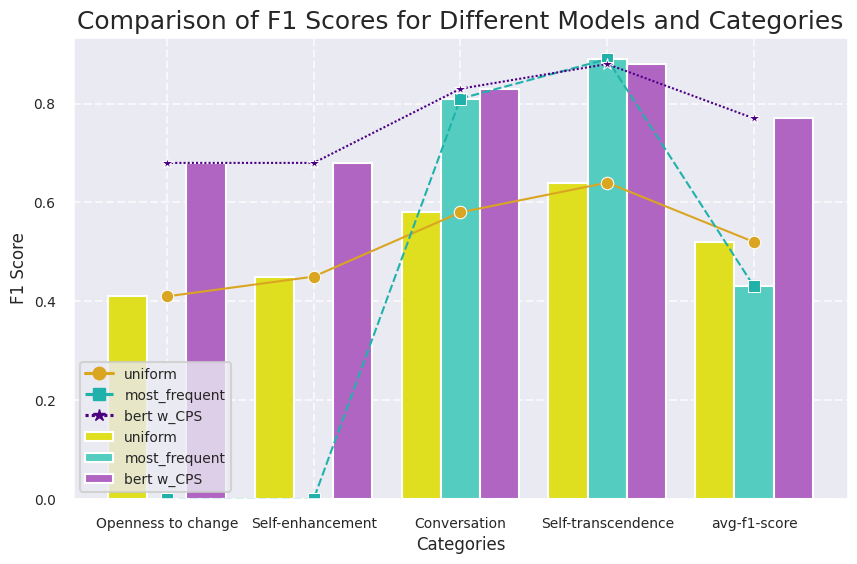

In [44]:
comparison_plot(df_uniform, df_majority, df_bert_CPS) 

### Comparing BERT Variants

- All three variants of the BERT (roberta-large) model show consistent and high performance across categories.
- The models with different input configurations (CPS, CP, P) yield similar results, suggesting that the inclusion of Stance (S) does not significantly impact performance in this context.
- The F1 scores are consistently high for each category, ranging from 0.66 to 0.89, with an average F1 score of approximately 0.77.
- The consistent high F1 scores suggest that the model effectively learns and captures the complexities of the data.

#### * Note *
On experimenting with we observed different performance scores, 'bert-base-uncased'(avg-f1-score = 0.72), 'bert-large-uncased'(avg-f1-score = 0.74) and 'roberta-base'(avg-f1-score = 0.74). But 'roberta-large' outperformed them.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


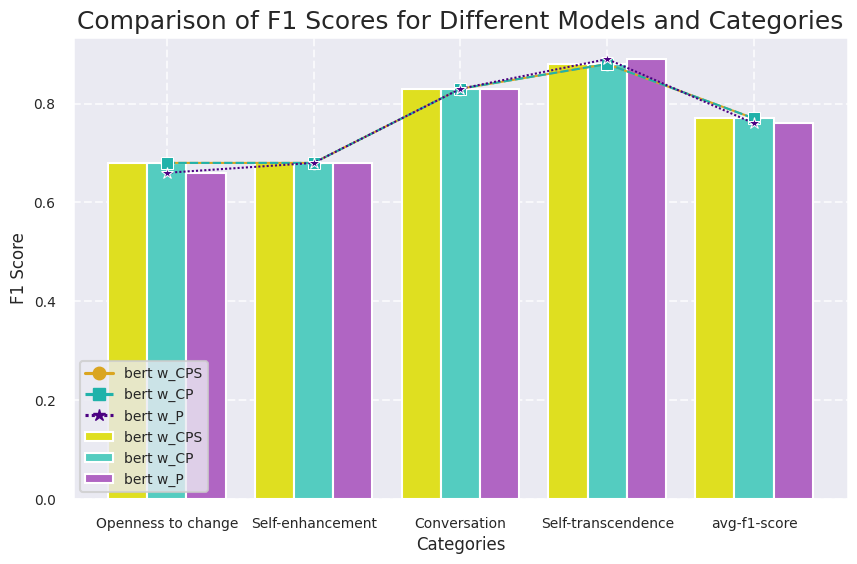

In [104]:
comparison_plot(df_bert_CPS, df_bert_CP, df_bert_P) 

### Best BERT (w/CPS) prediction analysis

We choose to carry out error analysis on roberta-large w/CPS. This is the model that performed same as w/CP and better than w/P.

Our error analysis highlight challenges in accurately classifying arguments related to ’Openness to change’ and ’Self-enhancement,’
where F1-scores were lower. These categories contained subtle distinctions and context-specific expressions, challenging the model’s generalization.

  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/1576 [00:00<?, ?ex/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

Class-wise Performance Metrics:
           Openness to change  Self-enhancement  Conversation  \
Precision                0.77              0.72          0.76   
Recall                   0.60              0.65          0.91   

           Self-transcendence  
Precision                0.84  
Recall                   0.93  


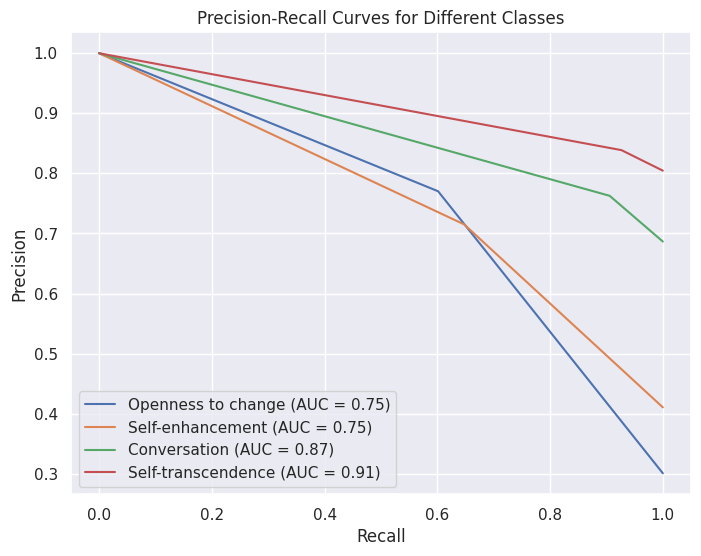

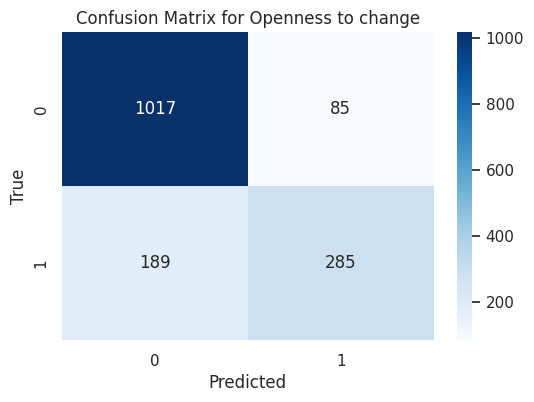

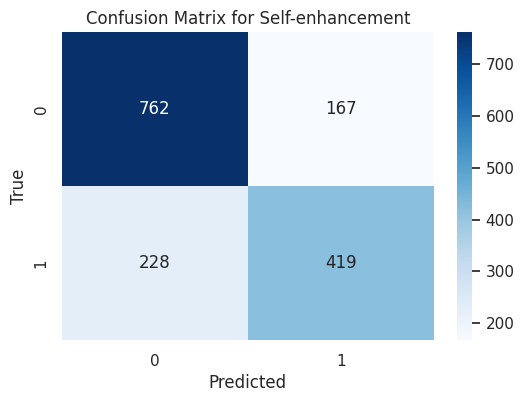

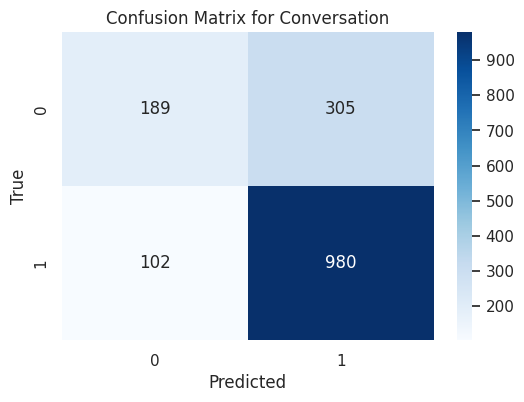

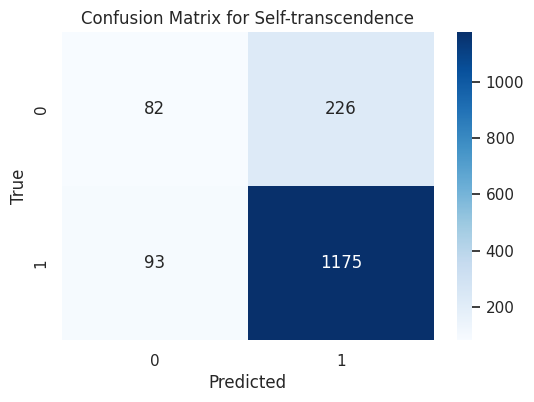

In [51]:
result = predict_bert_model(test_dataframe, ['Premise','Conclusion','Stance'], model_dict= os.path.join(model_dict, 'bert/{}_seed_{}'.format('w_CPS',456)), analyze=True)